**Data Augmentattion**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


Pathlib is to get the directory of downloaded Data
tf.keras.utilis.get_file('name.tar',extract=true,origin=dataset_url)
In return it will give the path of the downloaded dataset which is ~/.keras **bold text**

In [2]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


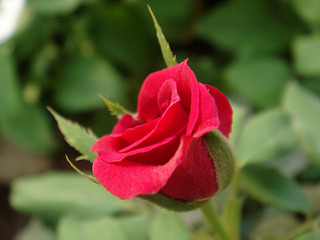

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[3]))

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
x = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
y = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = x.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


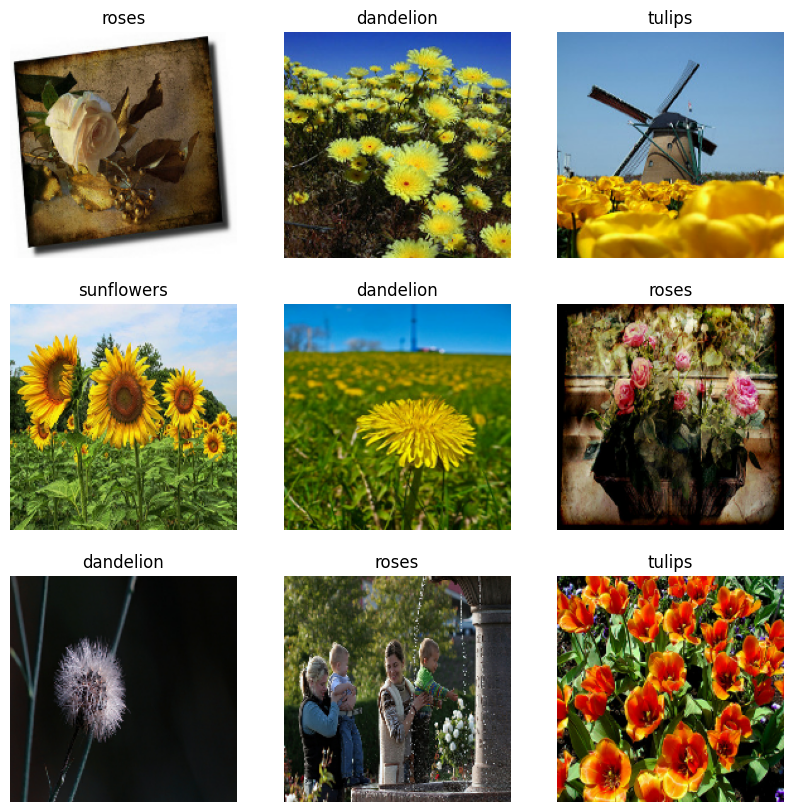

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in x.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

x = x.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
y = y.cache().prefetch(buffer_size=AUTOTUNE)


In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = x.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.015686275 1.0


In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [19]:
history = model.fit(x,validation_data=y,epochs=10)

Epoch 1/10
92/92 [==============================] - 2s 24ms/step - loss: 0.0300 - accuracy: 0.9932 - val_loss: 2.1989 - val_accuracy: 0.6117
Epoch 2/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0285 - accuracy: 0.9942 - val_loss: 1.9233 - val_accuracy: 0.6403
Epoch 3/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 2.1834 - val_accuracy: 0.6540
Epoch 4/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 2.1380 - val_accuracy: 0.6376
Epoch 5/10
92/92 [==============================] - 2s 21ms/step - loss: 0.0339 - accuracy: 0.9908 - val_loss: 1.9428 - val_accuracy: 0.6635
Epoch 6/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0082 - accuracy: 0.9990 - val_loss: 2.2783 - val_accuracy: 0.6635
Epoch 7/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.3419 - val_accuracy: 0.6594
Epoch 8/10
92

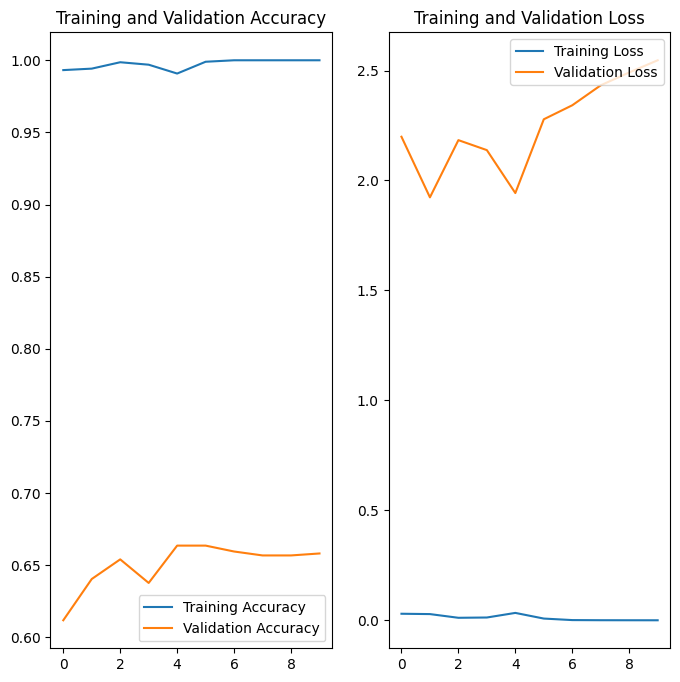

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(180,
                                  180,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

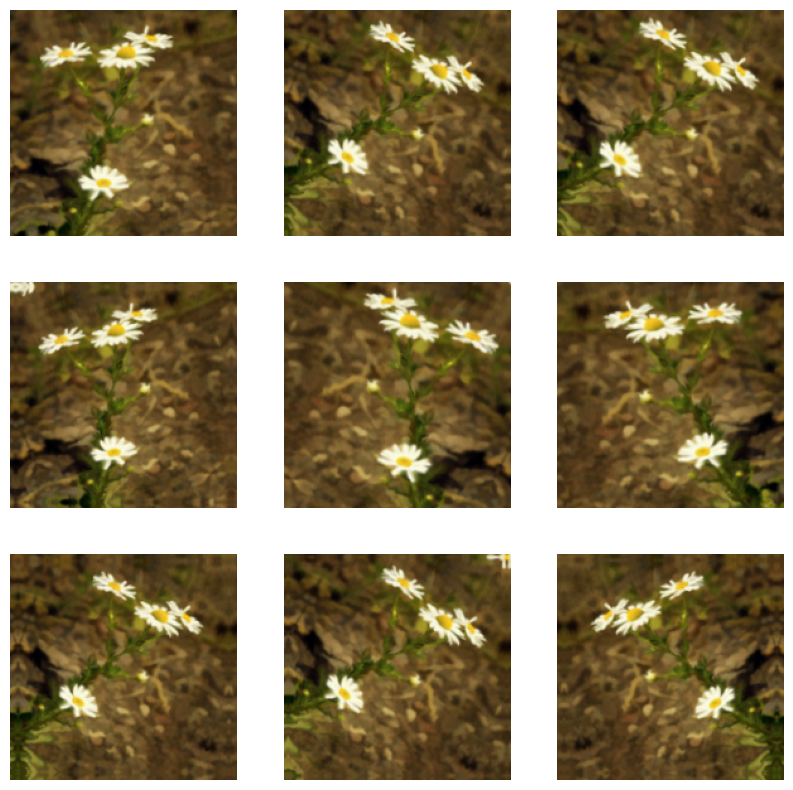

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in x.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [26]:
epochs = 15
history = model.fit(
  x,
  validation_data=y,
  epochs=epochs
)


Epoch 1/15
92/92 [==============================] - 6s 34ms/step - loss: 1.2941 - accuracy: 0.4404 - val_loss: 1.1420 - val_accuracy: 0.5477
Epoch 2/15
92/92 [==============================] - 3s 30ms/step - loss: 1.0524 - accuracy: 0.5797 - val_loss: 1.0060 - val_accuracy: 0.5858
Epoch 3/15
92/92 [==============================] - 3s 30ms/step - loss: 0.9630 - accuracy: 0.6206 - val_loss: 0.9244 - val_accuracy: 0.6485
Epoch 4/15
92/92 [==============================] - 3s 32ms/step - loss: 0.8831 - accuracy: 0.6608 - val_loss: 0.9150 - val_accuracy: 0.6376
Epoch 5/15
92/92 [==============================] - 3s 31ms/step - loss: 0.8281 - accuracy: 0.6788 - val_loss: 0.8239 - val_accuracy: 0.6757
Epoch 6/15
92/92 [==============================] - 3s 29ms/step - loss: 0.7846 - accuracy: 0.7030 - val_loss: 0.7955 - val_accuracy: 0.6771
Epoch 7/15
92/92 [==============================] - 3s 29ms/step - loss: 0.7692 - accuracy: 0.7091 - val_loss: 0.7889 - val_accuracy: 0.6798
Epoch 8/15
92

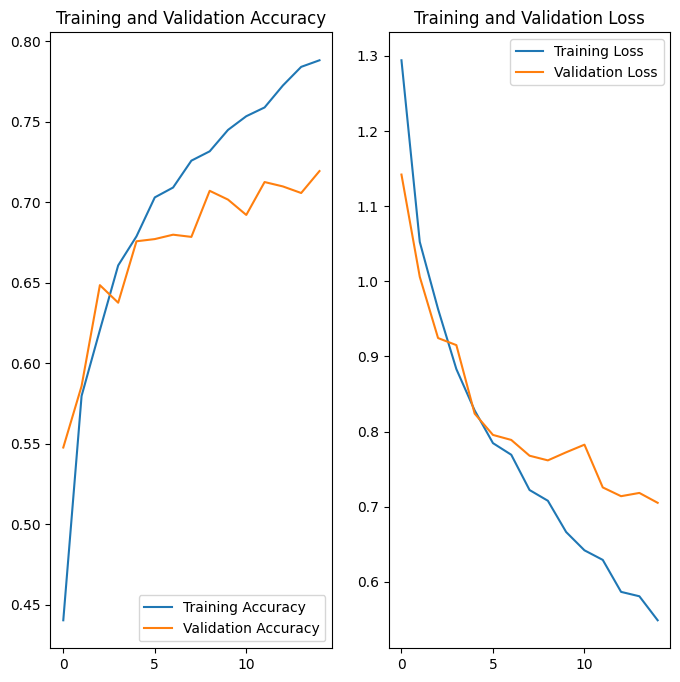

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()